In social network analysis, the basic mathematical tool is graph theory. In this notebook, we will go through some basic graph practice, for example,
1. how to build simple social network graphs
2. how to customise the graph with extra variables and how to use them 
3. how to build a directional graphs

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pprint as pp

# Greate your own graph

We can simply start adding edges by naming the nodes that are connected. Here, a weight (optional) is immediately included as well.

In [2]:
# initialise a graph
G = nx.Graph()

# add edges
# Weight means how many business trips between these two cities (not real data)
G.add_edge('London','Birmingham', weight = 5)
G.add_edge('London','Brighton', weight = 1)
G.add_edge('London','Bristol', weight = 1)
G.add_edge('London','York', weight = 2)
G.add_edge('York','Edinburgh', weight = 3)
G.add_edge('Edinburgh','Glasgow', weight = 2)

Describe edge and node

In [3]:
print('Edges')
print( G.number_of_edges())
print( G.edges())
print( )

print('Nodes')
print( G.number_of_nodes())
print( G.nodes())

Edges
6
[('London', 'Birmingham'), ('London', 'Brighton'), ('London', 'Bristol'), ('London', 'York'), ('York', 'Edinburgh'), ('Edinburgh', 'Glasgow')]

Nodes
7
['London', 'Birmingham', 'Brighton', 'Bristol', 'York', 'Edinburgh', 'Glasgow']


We can obtain various statistics regarding nodes:

In [4]:
for node in G.nodes():
    print('Number of neighbours of ', node, ':\t', len(G.adj[node]))
    print('Neighbours of ', node, ': ', G.adj[node])
    print('Degree: ', G.degree(node))
    print()

Number of neighbours of  London :	 4
Neighbours of  London :  {'Birmingham': {'weight': 5}, 'Brighton': {'weight': 1}, 'Bristol': {'weight': 1}, 'York': {'weight': 2}}
Degree:  4

Number of neighbours of  Birmingham :	 1
Neighbours of  Birmingham :  {'London': {'weight': 5}}
Degree:  1

Number of neighbours of  Brighton :	 1
Neighbours of  Brighton :  {'London': {'weight': 1}}
Degree:  1

Number of neighbours of  Bristol :	 1
Neighbours of  Bristol :  {'London': {'weight': 1}}
Degree:  1

Number of neighbours of  York :	 2
Neighbours of  York :  {'London': {'weight': 2}, 'Edinburgh': {'weight': 3}}
Degree:  2

Number of neighbours of  Edinburgh :	 2
Neighbours of  Edinburgh :  {'York': {'weight': 3}, 'Glasgow': {'weight': 2}}
Degree:  2

Number of neighbours of  Glasgow :	 1
Neighbours of  Glasgow :  {'Edinburgh': {'weight': 2}}
Degree:  1



In [5]:
node_of_interest = "London"

for node in G.neighbors(node_of_interest):
    print(node_of_interest, 'is a connected to', node )

London is a connected to Birmingham
London is a connected to Brighton
London is a connected to Bristol
London is a connected to York


Drawing a graph is relatively straightforward as well:

{'Birmingham': array([ 0.13863209, -0.42197311]),
 'Brighton': array([-0.62003033, -0.33256559]),
 'Bristol': array([-0.15549332, -0.8380354 ]),
 'Edinburgh': array([0.23726727, 0.62152435]),
 'Glasgow': array([0.37177962, 1.        ]),
 'London': array([-0.07154258, -0.26537865]),
 'York': array([0.09938725, 0.23642839])}


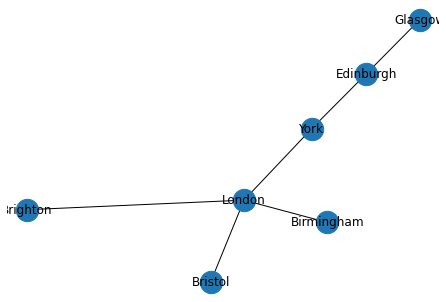

In [6]:
# Fruchterman-Reingold force-directed algorithm
pos = nx.spring_layout(G)
pp.pprint(pos)

nx.draw(G, pos, with_labels= True, node_size = 500)
plt.show()

It looks the nodes are a little small, let's re-scale the size of nodes

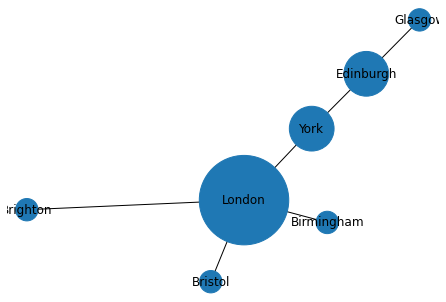

In [9]:
sizes = [G.degree(node) **2 * 500 # multiply
         for node in G.nodes()
        ]
    
# pos = nx.spring_layout(G) 
# notice, you do not need to re-calculate spring layout, can just reuse previous positions 

nx.draw(G, pos, with_labels= True, node_size = sizes)
plt.show()

**!!! Open Questions: Can you also try to resize the edge based on the weights?**

# Extra variables

We can assign extra variables to a connection. This can be done either you're creating nodes, or after they're already created. You might have reasons for one or the other.
- Adding variables when creating a node is easier, e.g., when you're loading values from a file.
- Adding once the graph is created can give you values, such as position or degree.

[2, 1, 2, 3, 2, 1]


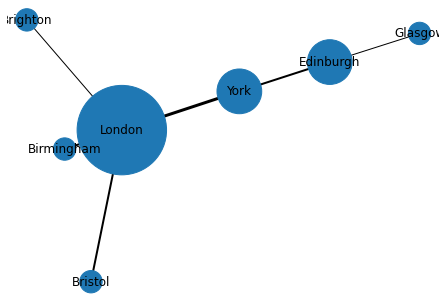

In [12]:
# initialise a graph
G = nx.Graph()

# Here I am adding a value for each connection, showing the distance between 
# these two cities (this is not the accurate data).

# you can come up with ANY variable name you want, and it will be added to the edge

# add edges
G.add_edge('London','Birmingham', weight = 5, distance=2)
G.add_edge('London','Brighton', weight = 1, distance=1)
G.add_edge('London','Bristol', weight = 1, distance=2)
G.add_edge('London','York', weight = 2, distance=3)
G.add_edge('York','Edinburgh', weight = 3, distance=2)
G.add_edge('Edinburgh','Glasgow', weight = 2, distance=1)

# get widths by getting value of 'distance' from each edge's data
widths = [G[edge[0]][edge[1]].get('distance',1)
          for edge in G.edges()]

sizes = [G.degree(node) **2 * 500 # exponential. in python **2 means 'to the power of 2'
         for node in G.nodes()
        ]

#recap: some_dictionary.get() takes two arguments: key to find, and default value if key not present

print(widths)
pos = nx.spring_layout(G)

nx.draw(G, pos, with_labels= True, node_size = sizes, width= widths)
plt.show()

It looks a little weired because distance shown in the graph is not the distance between two cities. 

**!!!Open Question, can you change the roles of 'weights' and 'distance' shown in the graphs?**

For many reasons, you want to add variables to edges even the graph was created.

You could do it like in the example below where we access value of a node that had to be calculated (eg. number of neighbours, or other metric)

In [13]:
for edge in G.edges():
    print("edge as tupple:",edge)
    source = edge[0]
    target = edge[1]
    source_neighbours_count =  len(list(G.neighbors(source)))
    target_neighbours_count = len(list(G.neighbors(target)))
    G[source][target]['total_neighbours'] = source_neighbours_count + target_neighbours_count
    
for edge in G.edges():
    print(G.get_edge_data(edge[0], edge[1]))

edge as tupple: ('London', 'Birmingham')
edge as tupple: ('London', 'Brighton')
edge as tupple: ('London', 'Bristol')
edge as tupple: ('London', 'York')
edge as tupple: ('York', 'Edinburgh')
edge as tupple: ('Edinburgh', 'Glasgow')
{'weight': 5, 'distance': 2, 'total_neighbours': 5}
{'weight': 1, 'distance': 1, 'total_neighbours': 5}
{'weight': 1, 'distance': 2, 'total_neighbours': 5}
{'weight': 2, 'distance': 3, 'total_neighbours': 6}
{'weight': 3, 'distance': 2, 'total_neighbours': 4}
{'weight': 2, 'distance': 1, 'total_neighbours': 3}


These are useful for drawing, e.g., the edge width.

We can add the widths as an argument to the draw function:

[25, 25, 25, 36, 16, 9]


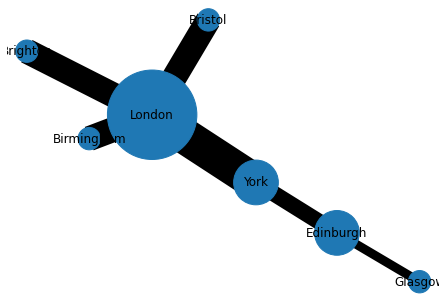

In [16]:
widths = [G[edge[0]][edge[1]].get('total_neighbours',1) **2
          for edge in G.edges()]

print(widths)

pos = nx.spring_layout(G)

nx.draw(G, pos, with_labels= True, node_size = sizes, width= widths)
plt.show()

# Draw a directed graphs

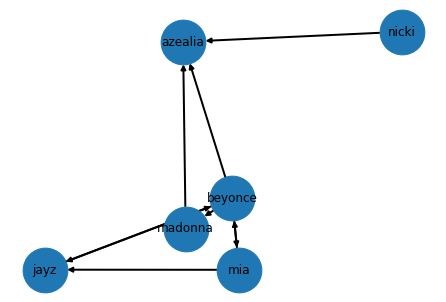

In [18]:
DG = nx.DiGraph()
DG.add_edge('beyonce','mia', weight = 5)
DG.add_edge('beyonce','azealia', weight = 1)
DG.add_edge('beyonce','jayz', weight = 1)
DG.add_edge('beyonce','madonna', weight = 2)
DG.add_edge('madonna','azealia', weight = 1)
DG.add_edge('nicki','azealia', weight = 1)

DG.add_edge('mia','beyonce', weight = 5)
DG.add_edge('jayz','beyonce', weight = 1)
DG.add_edge('mia','jayz', weight = 2)

pos = nx.spring_layout(DG)

nx.draw(DG, pos, with_labels= True, node_size = 2000, width=2)
plt.show()

## Exercise 1: Draw a network graph of Edinburgh Wavelet Train Station

## Exercise 2: Draw a directed graphs of your choice

# More graphs

In the next, we will look at:
- Loading and saving graph data into files, refer to https://networkx.org/documentation/stable/reference/readwrite/index.html
- Using bipartite graphs with two types of nodes
- styling graphs

## Write and read from edgelist

edge list format is: `Source Destination {'attribute':value}`

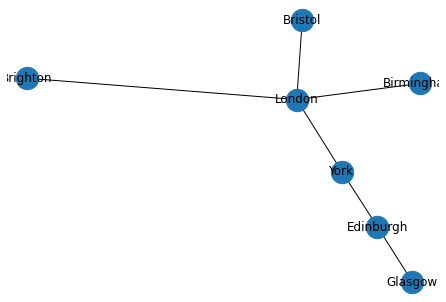

In [21]:
# initialise a graph
G = nx.Graph()

# add edges
# Weight means how many business trips between these two cities (not real data)
G.add_edge('London','Birmingham', weight = 5)
G.add_edge('London','Brighton', weight = 1)
G.add_edge('London','Bristol', weight = 1)
G.add_edge('London','York', weight = 2)
G.add_edge('York','Edinburgh', weight = 3)
G.add_edge('Edinburgh','Glasgow', weight = 2)

nx.draw(G, with_labels= True, node_size = 500)
plt.show()

In [27]:
# you can save your graph as a file:
nx.write_edgelist(G,'data/graph_city_edgelist.csv') # save to a new file

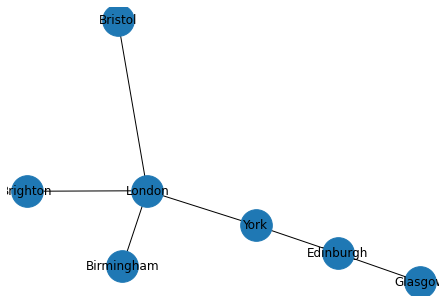

In [28]:
# Also we can read it from a csv file.
G = nx.read_edgelist('data/graph_city_edgelist.csv')

nx.draw(G, with_labels= True, node_size = 1000)
plt.show()

## Write and read from adjacency list

Adjacency list format: `source target target target target`

In [31]:
# save to a new file
nx.write_adjlist(G,'data/graph_city_adjacency.csv') 

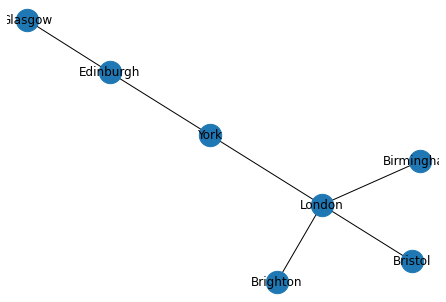

In [32]:
G = nx.read_adjlist('data/graph_city_adjacency.csv')

nx.draw(G, with_labels= True, node_size = 500)
plt.show()

## Bipartite graphs

Bipartite graphs contain two types of nodes. They are not a different object, but you can specify the type of connection by using the bipartite attribute:

In [33]:
from networkx.algorithms import bipartite

In [34]:
B = nx.Graph()

# Add nodes with the node attribute "bipartite"
B.add_nodes_from(["jill", "nicky", "tessa", "aga", "ecka", "min", "paola"], bipartite=0)
B.add_nodes_from(["netflix", "facebook", "instagram"], bipartite=1)

B.add_edge('jill','netflix')
B.add_edge('jill','facebook')
B.add_edge('jill','instagram')
B.add_edge('nicky','facebook')
B.add_edge('nicky','instagram')
B.add_edge('tessa','instagram')
B.add_edge('aga','instagram')
B.add_edge('aga','netflix')
B.add_edge('ecka','instagram')
B.add_edge('ecka','facebook')
B.add_edge('min','instagram')
B.add_edge('paola','instagram')


print(B.edges()) #all edges

[('jill', 'netflix'), ('jill', 'facebook'), ('jill', 'instagram'), ('nicky', 'facebook'), ('nicky', 'instagram'), ('tessa', 'instagram'), ('aga', 'instagram'), ('aga', 'netflix'), ('ecka', 'instagram'), ('ecka', 'facebook'), ('min', 'instagram'), ('paola', 'instagram')]


In [35]:
print(bipartite.color(B)) # returns values of 'bipartite' variable

{'jill': 1, 'netflix': 0, 'facebook': 0, 'instagram': 0, 'nicky': 1, 'tessa': 1, 'aga': 1, 'ecka': 1, 'min': 1, 'paola': 1}


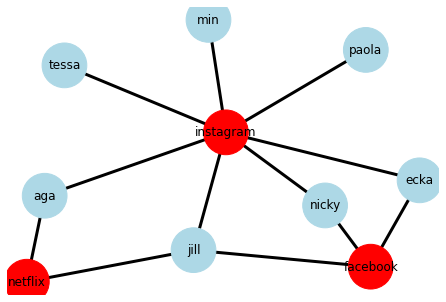

In [41]:
def nodes_colours(graph):
    nodes = graph.nodes() # nodes in correct order
    colours_dict = bipartite.color(graph) # dict with 0 or 1 telling you which group node is in
    return [
        "lightblue" if colours_dict[node] == 1 else "red"
        for node in nodes
    ]

pos = nx.spring_layout(B)

nx.draw(B, pos, with_labels= True, node_size = 2000, width = 3, node_color = nodes_colours(B)  )
plt.show()

## Another approach to style and specify details of a graph

In [38]:
users = [node for node in B.nodes() if bipartite.color(B)[node]==1]
websites = [node for node in B.nodes() if bipartite.color(B)[node]!=1]
print("websites",websites)
print("users",users)

websites ['netflix', 'facebook', 'instagram']
users ['jill', 'nicky', 'tessa', 'aga', 'ecka', 'min', 'paola']


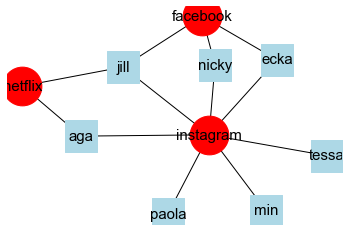

In [43]:
nodePos = nx.spring_layout(B)

nx.draw_networkx_nodes(B, nodePos, 
                       nodelist=websites, 
                       node_size = 1500, 
                       node_color ='red', 
                       node_shape ='o')

nx.draw_networkx_nodes(B, nodePos, 
                       nodelist=users, 
                       node_size=1000, 
                       node_color ='lightblue', 
                       node_shape ='s')

nx.draw_networkx_labels(B, pos=nodePos, font_size=15, 
                        font_family='arial')

nx.draw_networkx_edges(B,nodePos)


plt.axis('off')
plt.show()

# Graph metrics

In the next, we will look at graph metrics:
- degree
- bewteenness
- pagerank
- hits

In [45]:
import pandas as pd

In [46]:
# import a dataframe
df = pd.read_csv('data/graph_simple.csv', index_col = 0)
print(df)

         Natalie  Jill  Kasia  Boo  Dill  Xi  Rash
Natalie        0     1      0    4     1   0     1
Jill           1     0      0    1     0   5     0
Kasia          1     0      3    0     1   1     0
Boo            4     1      0    0     0   0     1
Dill           0     0      0    0     0   0     3
Xi             0     5      0    0     0   0     0
Rash           1     0      0    1     3   0     0


In [47]:
# use this dataframe to build the network
DG = nx.DiGraph()
for row, row_values in df.iterrows():
    print('\nNode: ', row)
    for column, value in enumerate(row_values):
        if value > 0:
            print('Connected to ', df.columns[column], ' with weight: ', value)
            DG.add_edge(row, df.columns[column], weight=value)


Node:  Natalie
Connected to  Jill  with weight:  1
Connected to  Boo  with weight:  4
Connected to  Dill  with weight:  1
Connected to  Rash  with weight:  1

Node:  Jill
Connected to  Natalie  with weight:  1
Connected to  Boo  with weight:  1
Connected to  Xi  with weight:  5

Node:  Kasia
Connected to  Natalie  with weight:  1
Connected to  Kasia  with weight:  3
Connected to  Dill  with weight:  1
Connected to  Xi  with weight:  1

Node:  Boo
Connected to  Natalie  with weight:  4
Connected to  Jill  with weight:  1
Connected to  Rash  with weight:  1

Node:  Dill
Connected to  Rash  with weight:  3

Node:  Xi
Connected to  Jill  with weight:  5

Node:  Rash
Connected to  Natalie  with weight:  1
Connected to  Boo  with weight:  1
Connected to  Dill  with weight:  3


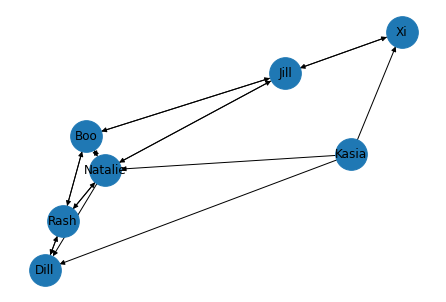

In [48]:
pos = nx.spring_layout(DG)

nx.draw(DG, pos, with_labels= True, node_size = 1000)
plt.show()

In [49]:
degree = nx.degree_centrality(DG)
betweenness = nx.betweenness_centrality(DG)
pagerank = nx.pagerank_numpy(DG)
hits = nx.hits_numpy(DG)

{'Boo': 1.0,
 'Dill': 0.6666666666666666,
 'Jill': 1.0,
 'Kasia': 0.8333333333333333,
 'Natalie': 1.3333333333333333,
 'Rash': 1.0,
 'Xi': 0.5}


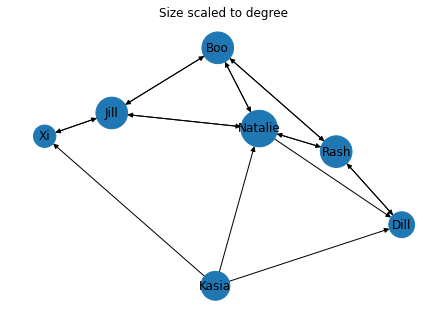

In [53]:
pp.pprint(degree)

pos = nx.spring_layout(DG)

size = [value * 1000 for value in degree.values()]

nx.draw(DG, pos, with_labels= True, node_size = size)
plt.title("Size scaled to degree")
plt.show()

{'Boo': 0.1,
 'Dill': 0.016666666666666666,
 'Jill': 0.26666666666666666,
 'Kasia': 0.0,
 'Natalie': 0.25,
 'Rash': 0.15,
 'Xi': 0.016666666666666666}


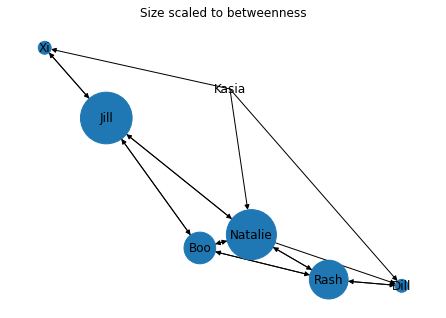

In [51]:
pp.pprint(betweenness)

pos = nx.spring_layout(DG)

size = [(value) * 10000  for value in betweenness.values()]

nx.draw(DG, pos, with_labels= True, node_size = size)
plt.title("Size scaled to betweenness")
plt.show()

{'Boo': 0.15599228081838898,
 'Dill': 0.1407226964146155,
 'Jill': 0.17902404568609806,
 'Kasia': 0.03726708074534166,
 'Natalie': 0.16804537192764066,
 'Rash': 0.1835472792786228,
 'Xi': 0.13540124512929222}


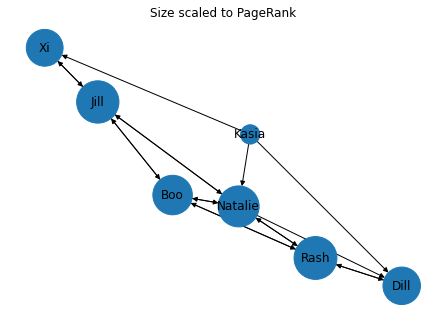

In [54]:
pp.pprint(pagerank)

pos = nx.spring_layout(DG)

size = [value * 10000 for value in pagerank.values()]

nx.draw(DG, pos, with_labels= True, node_size = size)
plt.title("Size scaled to PageRank")
plt.show()

{'Boo': 0.1678962767785594,
 'Dill': 0.03770296422278489,
 'Jill': 0.24232378729170853,
 'Kasia': 0.11269749710461745,
 'Natalie': 0.17642853382608598,
 'Rash': 0.1119007869940719,
 'Xi': 0.15105015378217204}


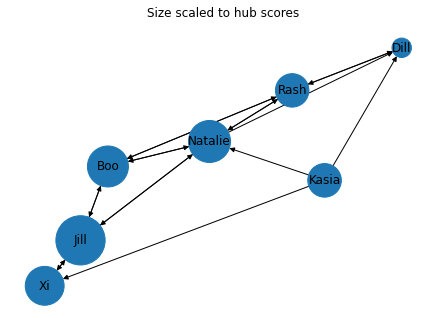

In [55]:
pp.pprint(hits[0])

pos = nx.spring_layout(DG)

size = [value * 10000 for value in hits[0].values()]

nx.draw(DG, pos, with_labels= True, node_size = size)
plt.title("Size scaled to hub scores")
plt.show()

{'Natalie': 0.1884105770444441, 'Jill': 0.1819678200998298, 'Boo': 0.1754083484725309, 'Dill': 0.103402314975905, 'Rash': 0.07570031144330833, 'Xi': 0.21915999138872275, 'Kasia': 0.05595063657525923}


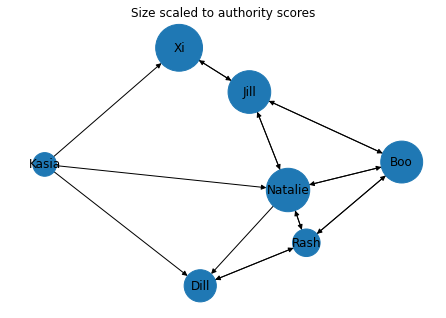

In [56]:
print(hits[1])

pos = nx.spring_layout(DG)

size = [value * 10000 for value in hits[1].values()]

nx.draw(DG, pos, with_labels= True, node_size = size)
plt.title("Size scaled to authority scores")
plt.show()

**!!! Open Questions which nodes are more likely hubs? which nodes are more likely authority?**
